In [ ]:

# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries loaded successfully")


Libraries loaded successfully


In [ ]:

# Load the two datasets
portfolio_v6 = pd.read_csv('final_synthesis_portfolio_v6.csv')
developability = pd.read_csv('developability_analysis.csv')

print("Portfolio V6 shape:", portfolio_v6.shape)
print("\nPortfolio V6 columns:")
print(portfolio_v6.columns.tolist())
print("\nFirst few rows of Portfolio V6:")
print(portfolio_v6.head())


Portfolio V6 shape: (100, 8)

Portfolio V6 columns:
['Final_Rank', 'Epitope_Target', 'Sequence', 'Motif', 'Scaffold', 'MJ_Score', 'Selection_Method', 'Original_Rank']

First few rows of Portfolio V6:
   Final_Rank Epitope_Target  \
0           1     Allosteric   
1           2     Allosteric   
2           3     Allosteric   
3           4     Allosteric   
4           5     Allosteric   

                                            Sequence      Motif Scaffold  \
0  MQYKLILNGKTLKGETTTELWCLICIWIVFKQYANDNGVDGVWTYD...  LWCLICIWI     1FNA   
1  MQYKLILNGKTLKGETTTEWWCLICILIVFKQYANDNGVDGVWTYD...  WWCLICILI     1FNA   
2  MQYKLILNGKTLKGETTTEIWCLWCLIIVFKQYANDNGVDGVWTYD...  IWCLWCLII     1FNA   
3                         GSDTITNATIKVQAIWCLWCLIIKVV  IWCLWCLII     1TEN   
4       MIEKKIEKLEEHLGLAWWCLICILIQKTQPGVSVGVKPFRFGGQ  WWCLICILI     2QMT   

   MJ_Score Selection_Method  Original_Rank  
0  -2128.42        MJ-Top-20              1  
1  -2128.42        MJ-Top-20              2  
2  -2128.42 

In [ ]:

# Check developability dataset
print("Developability shape:", developability.shape)
print("\nDevelopability columns:")
print(developability.columns.tolist())
print("\nFirst few rows of Developability:")
print(developability.head())


Developability shape: (200, 14)

Developability columns:
['Sequence', 'Portfolio', 'Epitope_Target', 'Motif', 'Scaffold', 'Primary_Score', 'Aggregation_Propensity', 'Solubility_Index', 'Z_Aggregation', 'Z_Solubility', 'Developability_Score', 'High_Developability', 'High_Binding', 'Dual_Optimized']

First few rows of Developability:
                                            Sequence Portfolio Epitope_Target  \
0  MQYKLILNGKTLKGETTTELWCLICIWIVFKQYANDNGVDGVWTYD...        MJ     Allosteric   
1  MQYKLILNGKTLKGETTTEWWCLICILIVFKQYANDNGVDGVWTYD...        MJ     Allosteric   
2  MQYKLILNGKTLKGETTTEIWCLWCLIIVFKQYANDNGVDGVWTYD...        MJ     Allosteric   
3                         GSDTITNATIKVQAIWCLWCLIIKVV        MJ     Allosteric   
4       MIEKKIEKLEEHLGLAWWCLICILIQKTQPGVSVGVKPFRFGGQ        MJ     Allosteric   

       Motif Scaffold  Primary_Score  Aggregation_Propensity  \
0  LWCLICIWI     1FNA       -2128.42               25.048778   
1  WWCLICILI     1FNA       -2128.42               

In [ ]:

# Merge the two datasets on Sequence column
# This will add developability metrics to the portfolio candidates
merged_data = portfolio_v6.merge(
    developability[['Sequence', 'Aggregation_Propensity', 'Solubility_Index', 
                    'Z_Aggregation', 'Z_Solubility', 'Developability_Score',
                    'High_Developability', 'High_Binding', 'Dual_Optimized']],
    on='Sequence',
    how='left'
)

print("Merged data shape:", merged_data.shape)
print("\nCheck for any missing values after merge:")
print(merged_data.isnull().sum())
print("\nFirst few rows of merged data:")
print(merged_data.head())


Merged data shape: (104, 16)

Check for any missing values after merge:
Final_Rank                0
Epitope_Target            0
Sequence                  0
Motif                     0
Scaffold                  0
MJ_Score                  0
Selection_Method          0
Original_Rank             0
Aggregation_Propensity    0
Solubility_Index          0
Z_Aggregation             0
Z_Solubility              0
Developability_Score      0
High_Developability       0
High_Binding              0
Dual_Optimized            0
dtype: int64

First few rows of merged data:
   Final_Rank Epitope_Target  \
0           1     Allosteric   
1           2     Allosteric   
2           3     Allosteric   
3           4     Allosteric   
4           5     Allosteric   

                                            Sequence      Motif Scaffold  \
0  MQYKLILNGKTLKGETTTELWCLICIWIVFKQYANDNGVDGVWTYD...  LWCLICIWI     1FNA   
1  MQYKLILNGKTLKGETTTEWWCLICILIVFKQYANDNGVDGVWTYD...  WWCLICILI     1FNA   
2  MQYKLILNGKT

In [ ]:

# Check for duplicates - the merge resulted in 104 rows instead of 100
# This suggests some sequences appear multiple times in the developability dataset
print("Checking for duplicate sequences in merged data:")
duplicate_check = merged_data.groupby('Sequence').size()
duplicates = duplicate_check[duplicate_check > 1]
print(f"\nNumber of sequences with duplicates: {len(duplicates)}")
print("\nDuplicate sequences and their counts:")
print(duplicates)

# Check if these duplicates are in the developability dataset
print("\n\nChecking developability dataset for these sequences:")
for seq in duplicates.index[:3]:  # Check first 3 duplicates
    print(f"\nSequence: {seq[:50]}...")
    print(developability[developability['Sequence'] == seq][['Portfolio', 'Epitope_Target', 'Primary_Score']])


Checking for duplicate sequences in merged data:

Number of sequences with duplicates: 4

Duplicate sequences and their counts:
Sequence
GSDTITNATIKVQAWQCLIWILIKVV                                  2
MIEKKIEKLEEHLGLAWQCLIWILIQKTQPGVSVGVKPFRFGGQ                2
MQYKLILNGKTLKGETTTEIQWLLCWIIVFKQYANDNGVDGVWTYDDATKTFTVTE    2
MQYKLILNGKTLKGETTTELQWLICIWIVFKQYANDNGVDGVWTYDDATKTFTVTE    2
dtype: int64


Checking developability dataset for these sequences:

Sequence: GSDTITNATIKVQAWQCLIWILIKVV...
    Portfolio Epitope_Target  Primary_Score
19         MJ     Allosteric       -2127.84
144     Proxy     Allosteric          -1.50

Sequence: MIEKKIEKLEEHLGLAWQCLIWILIQKTQPGVSVGVKPFRFGGQ...
    Portfolio Epitope_Target  Primary_Score
18         MJ     Allosteric       -2127.84
145     Proxy     Allosteric          -1.50

Sequence: MQYKLILNGKTLKGETTTEIQWLLCWIIVFKQYANDNGVDGVWTYDDATK...
    Portfolio Epitope_Target  Primary_Score
17         MJ     Allosteric       -2127.84
146     Proxy     Allosteric  

In [ ]:

# The duplicates occurred because some sequences appear in both MJ and Proxy portfolios
# in the developability dataset. Since the developability metrics are the same for both entries,
# we can safely drop duplicates after the merge.

print("Before removing duplicates:", merged_data.shape)
print("\nChecking if developability scores are identical for duplicates:")
for seq in duplicates.index[:2]:
    dup_rows = merged_data[merged_data['Sequence'] == seq]
    print(f"\nSequence: {seq[:40]}...")
    print(dup_rows[['Final_Rank', 'Selection_Method', 'Developability_Score', 'Aggregation_Propensity', 'Solubility_Index']])

# Remove duplicates keeping the first occurrence
merged_data = merged_data.drop_duplicates(subset='Sequence', keep='first')

print("\n\nAfter removing duplicates:", merged_data.shape)
print("Verified we have 100 unique candidates:", len(merged_data) == 100)


Before removing duplicates: (104, 16)

Checking if developability scores are identical for duplicates:

Sequence: GSDTITNATIKVQAWQCLIWILIKVV...
    Final_Rank Selection_Method  Developability_Score  Aggregation_Propensity  \
22          20        MJ-Top-20             -0.528207                15.70925   
23          20        MJ-Top-20             -0.528207                15.70925   

    Solubility_Index  
22         -0.380769  
23         -0.380769  

Sequence: MIEKKIEKLEEHLGLAWQCLIWILIQKTQPGVSVGVKPFR...
    Final_Rank Selection_Method  Developability_Score  Aggregation_Propensity  \
20          19        MJ-Top-20             -2.153075               24.234028   
21          19        MJ-Top-20             -2.153075               24.234028   

    Solubility_Index  
20         -0.438636  
21         -0.438636  


After removing duplicates: (100, 16)
Verified we have 100 unique candidates: True


In [ ]:

# Step 3: Normalize the binding scores (MJ_Score) and Developability_Score
# Important: More negative MJ scores are better, so we multiply by -1 before normalization
# so that higher values represent better binding

# Create inverted MJ score (multiply by -1 so more negative becomes more positive)
merged_data['MJ_Score_Inverted'] = -1 * merged_data['MJ_Score']

# Calculate z-scores for both binding and developability
# Z-score = (X - mean) / std
mj_mean = merged_data['MJ_Score_Inverted'].mean()
mj_std = merged_data['MJ_Score_Inverted'].std()
merged_data['Z_Binding_Score'] = (merged_data['MJ_Score_Inverted'] - mj_mean) / mj_std

dev_mean = merged_data['Developability_Score'].mean()
dev_std = merged_data['Developability_Score'].std()
merged_data['Z_Developability'] = (merged_data['Developability_Score'] - dev_mean) / dev_std

print("Binding Score Statistics:")
print(f"  MJ_Score range: {merged_data['MJ_Score'].min():.2f} to {merged_data['MJ_Score'].max():.2f}")
print(f"  MJ_Score_Inverted mean: {mj_mean:.2f}, std: {mj_std:.2f}")
print(f"  Z_Binding_Score range: {merged_data['Z_Binding_Score'].min():.3f} to {merged_data['Z_Binding_Score'].max():.3f}")

print("\nDevelopability Score Statistics:")
print(f"  Developability_Score range: {merged_data['Developability_Score'].min():.2f} to {merged_data['Developability_Score'].max():.2f}")
print(f"  Developability_Score mean: {dev_mean:.2f}, std: {dev_std:.2f}")
print(f"  Z_Developability range: {merged_data['Z_Developability'].min():.3f} to {merged_data['Z_Developability'].max():.3f}")


Binding Score Statistics:
  MJ_Score range: -2128.42 to 567.44
  MJ_Score_Inverted mean: 740.25, std: 956.07
  Z_Binding_Score range: -1.368 to 1.452

Developability Score Statistics:
  Developability_Score range: -3.31 to 2.80
  Developability_Score mean: 0.03, std: 1.49
  Z_Developability range: -2.234 to 1.860


In [ ]:

# Step 4: Calculate Performance Score as the sum of normalized binding and developability z-scores
merged_data['Performance_Score'] = merged_data['Z_Binding_Score'] + merged_data['Z_Developability']

print("Performance Score Statistics:")
print(f"  Range: {merged_data['Performance_Score'].min():.3f} to {merged_data['Performance_Score'].max():.3f}")
print(f"  Mean: {merged_data['Performance_Score'].mean():.3f}")
print(f"  Std: {merged_data['Performance_Score'].std():.3f}")

print("\nTop 10 candidates by Performance Score:")
top10 = merged_data.nlargest(10, 'Performance_Score')[['Sequence', 'Epitope_Target', 
                                                         'Selection_Method', 'MJ_Score', 
                                                         'Developability_Score', 'Performance_Score']]
print(top10.to_string())


Performance Score Statistics:
  Range: -2.890 to 1.988
  Mean: 0.000
  Std: 1.336

Top 10 candidates by Performance Score:
                                                                                       Sequence Epitope_Target Selection_Method  MJ_Score  Developability_Score  Performance_Score
101                                    MQYKLILNGKTLKGETTTEAVDAATAEKVRGMIDFLAWVDGEWTYDDATKTFTVTE    Competitive    Hybrid-Top-10   -861.92              2.804330           1.987689
103                                    MQYKLILNGKTLKGETTTEAVDAATAEKVRGIMDFLAWVDGEWTYDDATKTFTVTE    Competitive    Hybrid-Top-10   -861.92              2.804330           1.987689
44   RLDAPSQIEVKDVTDTTALITWFKLYDFGISFMLTYGIKDVPGDRTTIDLTEDENQYSIGNLKPDTEYEVSLISRRGDMSSNPAKETFTT     Allosteric     MJ-Test-Pair  -2115.85              0.609234           1.828247
80                                     MQYKLILNGKTLKGETTTEAVDAATAEKVEGIIDFIAWVDGEWTYDDATKTFTVTE    Competitive     Proxy-Top-20   -848.79              2.568402  

In [ ]:

# Step 5: Rank candidates in descending order by Performance_Score and create final portfolio
final_portfolio_v7 = merged_data.sort_values('Performance_Score', ascending=False).reset_index(drop=True)

# Create final rank column (1-100)
final_portfolio_v7['Final_Rank_V7'] = range(1, len(final_portfolio_v7) + 1)

# Select and reorder columns for the final output file
output_columns = [
    'Final_Rank_V7',
    'Sequence',
    'Epitope_Target',
    'Selection_Method',
    'Motif',
    'Scaffold',
    'Performance_Score',
    'Z_Binding_Score',
    'Z_Developability',
    'MJ_Score',
    'Developability_Score',
    'Aggregation_Propensity',
    'Solubility_Index',
    'Dual_Optimized',
    'Original_Rank',
    'Final_Rank'
]

final_output = final_portfolio_v7[output_columns]

# Save to CSV
final_output.to_csv('final_synthesis_portfolio_v7.csv', index=False)

print("Final synthesis portfolio V7 created successfully!")
print(f"Total candidates: {len(final_output)}")
print("\nFirst 10 candidates in the final portfolio:")
print(final_output.head(10).to_string())


Final synthesis portfolio V7 created successfully!
Total candidates: 100

First 10 candidates in the final portfolio:
   Final_Rank_V7                                                                                    Sequence Epitope_Target Selection_Method      Motif Scaffold  Performance_Score  Z_Binding_Score  Z_Developability  MJ_Score  Developability_Score  Aggregation_Propensity  Solubility_Index  Dual_Optimized  Original_Rank  Final_Rank
0              1                                    MQYKLILNGKTLKGETTTEAVDAATAEKVRGMIDFLAWVDGEWTYDDATKTFTVTE    Competitive    Hybrid-Top-10  RGMIDFLAW     2QMT           1.987689         0.127257          1.860432   -861.92              2.804330                0.000000         -0.243750           False             57          98
1              2                                    MQYKLILNGKTLKGETTTEAVDAATAEKVRGIMDFLAWVDGEWTYDDATKTFTVTE    Competitive    Hybrid-Top-10  RGIMDFLAW     2QMT           1.987689         0.127257          1.860432   -

In [ ]:

# Analyze the composition of the final V7 portfolio compared to V6
print("=== PORTFOLIO COMPOSITION ANALYSIS ===\n")

# Compare epitope target distribution
print("Epitope Target Distribution:")
print("V6 Portfolio:")
print(portfolio_v6['Epitope_Target'].value_counts())
print("\nV7 Portfolio (Performance-ranked):")
print(final_output['Epitope_Target'].value_counts())

# Compare selection method distribution
print("\n\nSelection Method Distribution:")
print("V6 Portfolio:")
print(portfolio_v6['Selection_Method'].value_counts())
print("\nV7 Portfolio (Performance-ranked):")
print(final_output['Selection_Method'].value_counts())

# Check dual-optimized candidates
print("\n\nDual-Optimized Candidates:")
print(f"Total dual-optimized in portfolio: {final_output['Dual_Optimized'].sum()}")
print(f"Dual-optimized in top 10: {final_output.head(10)['Dual_Optimized'].sum()}")
print(f"Dual-optimized in top 25: {final_output.head(25)['Dual_Optimized'].sum()}")
print(f"Dual-optimized in top 50: {final_output.head(50)['Dual_Optimized'].sum()}")


=== PORTFOLIO COMPOSITION ANALYSIS ===

Epitope Target Distribution:
V6 Portfolio:
Epitope_Target
Allosteric     50
Competitive    50
Name: count, dtype: int64

V7 Portfolio (Performance-ranked):
Epitope_Target
Competitive    50
Allosteric     50
Name: count, dtype: int64


Selection Method Distribution:
V6 Portfolio:
Selection_Method
MJ-Top-20         40
Proxy-Top-20      40
Hybrid-Top-10     10
Proxy-Extended     8
MJ-Test-Pair       2
Name: count, dtype: int64

V7 Portfolio (Performance-ranked):
Selection_Method
Proxy-Top-20      40
MJ-Top-20         40
Hybrid-Top-10     10
Proxy-Extended     8
MJ-Test-Pair       2
Name: count, dtype: int64


Dual-Optimized Candidates:
Total dual-optimized in portfolio: 22
Dual-optimized in top 10: 1
Dual-optimized in top 25: 9
Dual-optimized in top 50: 13


In [ ]:

# Analyze ranking changes from V6 to V7
print("=== RANKING SHIFT ANALYSIS ===\n")

# Calculate rank changes
final_portfolio_v7['Rank_Change'] = final_portfolio_v7['Final_Rank'] - final_portfolio_v7['Final_Rank_V7']

print("Rank Change Statistics:")
print(f"  Mean absolute rank change: {abs(final_portfolio_v7['Rank_Change']).mean():.2f} positions")
print(f"  Median absolute rank change: {abs(final_portfolio_v7['Rank_Change']).median():.2f} positions")
print(f"  Max rank improvement (V6->V7): {final_portfolio_v7['Rank_Change'].max():.0f} positions")
print(f"  Max rank decline (V6->V7): {final_portfolio_v7['Rank_Change'].min():.0f} positions")

# Identify biggest movers
print("\n\nBiggest Rank Improvements (V6 -> V7):")
biggest_gainers = final_portfolio_v7.nlargest(5, 'Rank_Change')[['Final_Rank_V7', 'Final_Rank', 'Rank_Change', 
                                                                    'Epitope_Target', 'Selection_Method', 
                                                                    'Performance_Score', 'MJ_Score', 
                                                                    'Developability_Score']]
print(biggest_gainers.to_string())

print("\n\nBiggest Rank Declines (V6 -> V7):")
biggest_losers = final_portfolio_v7.nsmallest(5, 'Rank_Change')[['Final_Rank_V7', 'Final_Rank', 'Rank_Change', 
                                                                   'Epitope_Target', 'Selection_Method', 
                                                                   'Performance_Score', 'MJ_Score', 
                                                                   'Developability_Score']]
print(biggest_losers.to_string())


=== RANKING SHIFT ANALYSIS ===

Rank Change Statistics:
  Mean absolute rank change: 44.40 positions
  Median absolute rank change: 47.00 positions
  Max rank improvement (V6->V7): 98 positions
  Max rank decline (V6->V7): -71 positions


Biggest Rank Improvements (V6 -> V7):
   Final_Rank_V7  Final_Rank  Rank_Change Epitope_Target Selection_Method  Performance_Score  MJ_Score  Developability_Score
1              2         100           98    Competitive    Hybrid-Top-10           1.987689   -861.92              2.804330
0              1          98           97    Competitive    Hybrid-Top-10           1.987689   -861.92              2.804330
5              6          95           89    Competitive    Hybrid-Top-10           1.791354   -861.92              2.511348
8              9          97           88    Competitive    Hybrid-Top-10           1.667938   -861.92              2.327181
6              7          90           83    Competitive     Proxy-Top-20           1.692848   -86

In [ ]:

# Analyze the correlation between Performance Score components and epitope targets
print("=== CORRELATION ANALYSIS ===\n")

# Overall correlations
print("Correlation between Performance Score components (all candidates):")
print(f"  Pearson correlation (Z_Binding vs Z_Developability): {final_portfolio_v7['Z_Binding_Score'].corr(final_portfolio_v7['Z_Developability']):.3f}")
print(f"  Pearson correlation (MJ_Score vs Developability): {final_portfolio_v7['MJ_Score'].corr(final_portfolio_v7['Developability_Score']):.3f}")

# By epitope target
print("\n\nBy Epitope Target:")
for target in ['Allosteric', 'Competitive']:
    subset = final_portfolio_v7[final_portfolio_v7['Epitope_Target'] == target]
    corr = subset['Z_Binding_Score'].corr(subset['Z_Developability'])
    print(f"  {target}: Z_Binding vs Z_Developability correlation = {corr:.3f}")

# By selection method
print("\n\nBy Selection Method:")
for method in final_portfolio_v7['Selection_Method'].unique():
    subset = final_portfolio_v7[final_portfolio_v7['Selection_Method'] == method]
    corr = subset['Z_Binding_Score'].corr(subset['Z_Developability'])
    print(f"  {method}: Z_Binding vs Z_Developability correlation = {corr:.3f}")


=== CORRELATION ANALYSIS ===

Correlation between Performance Score components (all candidates):
  Pearson correlation (Z_Binding vs Z_Developability): -0.108
  Pearson correlation (MJ_Score vs Developability): 0.108


By Epitope Target:
  Allosteric: Z_Binding vs Z_Developability correlation = -0.459
  Competitive: Z_Binding vs Z_Developability correlation = -0.058


By Selection Method:
  Hybrid-Top-10: Z_Binding vs Z_Developability correlation = -0.447
  MJ-Test-Pair: Z_Binding vs Z_Developability correlation = -1.000
  Proxy-Top-20: Z_Binding vs Z_Developability correlation = 0.768
  MJ-Top-20: Z_Binding vs Z_Developability correlation = -0.835
  Proxy-Extended: Z_Binding vs Z_Developability correlation = nan


/app/miniconda/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/app/miniconda/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:

# Analyze epitope target and selection method distribution in top-ranked candidates
print("=== TOP-RANKED CANDIDATES ANALYSIS ===\n")

# Analyze top 10, 25, 50 candidates
for n in [10, 25, 50]:
    top_n = final_output.head(n)
    print(f"\nTop {n} Candidates:")
    print(f"  Epitope Target:")
    print(f"    Competitive: {(top_n['Epitope_Target'] == 'Competitive').sum()} ({(top_n['Epitope_Target'] == 'Competitive').sum()/n*100:.1f}%)")
    print(f"    Allosteric: {(top_n['Epitope_Target'] == 'Allosteric').sum()} ({(top_n['Epitope_Target'] == 'Allosteric').sum()/n*100:.1f}%)")
    print(f"  Selection Method:")
    for method in top_n['Selection_Method'].value_counts().index:
        count = (top_n['Selection_Method'] == method).sum()
        print(f"    {method}: {count} ({count/n*100:.1f}%)")

# Compare average scores between top and bottom performers
print("\n\n=== PERFORMANCE COMPARISON ===")
print("\nTop 50 vs Bottom 50 Average Scores:")
top_50 = final_output.head(50)
bottom_50 = final_output.tail(50)

print(f"\nTop 50:")
print(f"  Average Performance Score: {top_50['Performance_Score'].mean():.3f}")
print(f"  Average MJ Score: {top_50['MJ_Score'].mean():.2f}")
print(f"  Average Developability Score: {top_50['Developability_Score'].mean():.3f}")

print(f"\nBottom 50:")
print(f"  Average Performance Score: {bottom_50['Performance_Score'].mean():.3f}")
print(f"  Average MJ Score: {bottom_50['MJ_Score'].mean():.2f}")
print(f"  Average Developability Score: {bottom_50['Developability_Score'].mean():.3f}")


=== TOP-RANKED CANDIDATES ANALYSIS ===


Top 10 Candidates:
  Epitope Target:
    Competitive: 9 (90.0%)
    Allosteric: 1 (10.0%)
  Selection Method:
    Proxy-Top-20: 5 (50.0%)
    Hybrid-Top-10: 4 (40.0%)
    MJ-Test-Pair: 1 (10.0%)

Top 25 Candidates:
  Epitope Target:
    Competitive: 22 (88.0%)
    Allosteric: 3 (12.0%)
  Selection Method:
    MJ-Top-20: 10 (40.0%)
    Proxy-Top-20: 9 (36.0%)
    Hybrid-Top-10: 5 (20.0%)
    MJ-Test-Pair: 1 (4.0%)

Top 50 Candidates:
  Epitope Target:
    Competitive: 37 (74.0%)
    Allosteric: 13 (26.0%)
  Selection Method:
    MJ-Top-20: 23 (46.0%)
    Proxy-Top-20: 16 (32.0%)
    Hybrid-Top-10: 10 (20.0%)
    MJ-Test-Pair: 1 (2.0%)


=== PERFORMANCE COMPARISON ===

Top 50 vs Bottom 50 Average Scores:

Top 50:
  Average Performance Score: 1.051
  Average MJ Score: -1187.97
  Average Developability Score: 0.898

Bottom 50:
  Average Performance Score: -1.051
  Average MJ Score: -292.54
  Average Developability Score: -0.842


In [ ]:

# Create summary statistics table for the final portfolio
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Candidates',
        'Competitive Binders',
        'Allosteric Binders',
        'Dual-Optimized (Total)',
        'Dual-Optimized (Top 25)',
        'Dual-Optimized (Top 50)',
        'Mean Performance Score',
        'Std Performance Score',
        'Mean MJ Score',
        'Mean Developability Score',
        'Correlation (Z_Binding vs Z_Dev)'
    ],
    'Value': [
        100,
        50,
        50,
        22,
        9,
        13,
        f"{final_output['Performance_Score'].mean():.3f}",
        f"{final_output['Performance_Score'].std():.3f}",
        f"{final_output['MJ_Score'].mean():.2f}",
        f"{final_output['Developability_Score'].mean():.3f}",
        f"{final_portfolio_v7['Z_Binding_Score'].corr(final_portfolio_v7['Z_Developability']):.3f}"
    ]
})

print("=== FINAL PORTFOLIO V7 SUMMARY ===\n")
print(summary_stats.to_string(index=False))

# Check the specific top 10 candidates in detail
print("\n\n=== TOP 10 CANDIDATES DETAILED VIEW ===\n")
top_10_detailed = final_output.head(10)[['Final_Rank_V7', 'Epitope_Target', 'Selection_Method', 
                                          'MJ_Score', 'Developability_Score', 'Performance_Score',
                                          'Dual_Optimized']]
print(top_10_detailed.to_string())


=== FINAL PORTFOLIO V7 SUMMARY ===

                          Metric   Value
                Total Candidates     100
             Competitive Binders      50
              Allosteric Binders      50
          Dual-Optimized (Total)      22
         Dual-Optimized (Top 25)       9
         Dual-Optimized (Top 50)      13
          Mean Performance Score   0.000
           Std Performance Score   1.336
                   Mean MJ Score -740.25
       Mean Developability Score   0.028
Correlation (Z_Binding vs Z_Dev)  -0.108


=== TOP 10 CANDIDATES DETAILED VIEW ===

   Final_Rank_V7 Epitope_Target Selection_Method  MJ_Score  Developability_Score  Performance_Score  Dual_Optimized
0              1    Competitive    Hybrid-Top-10   -861.92              2.804330           1.987689           False
1              2    Competitive    Hybrid-Top-10   -861.92              2.804330           1.987689           False
2              3     Allosteric     MJ-Test-Pair  -2115.85              0.609234 

Figure saved as 'performance_score_landscape.png'


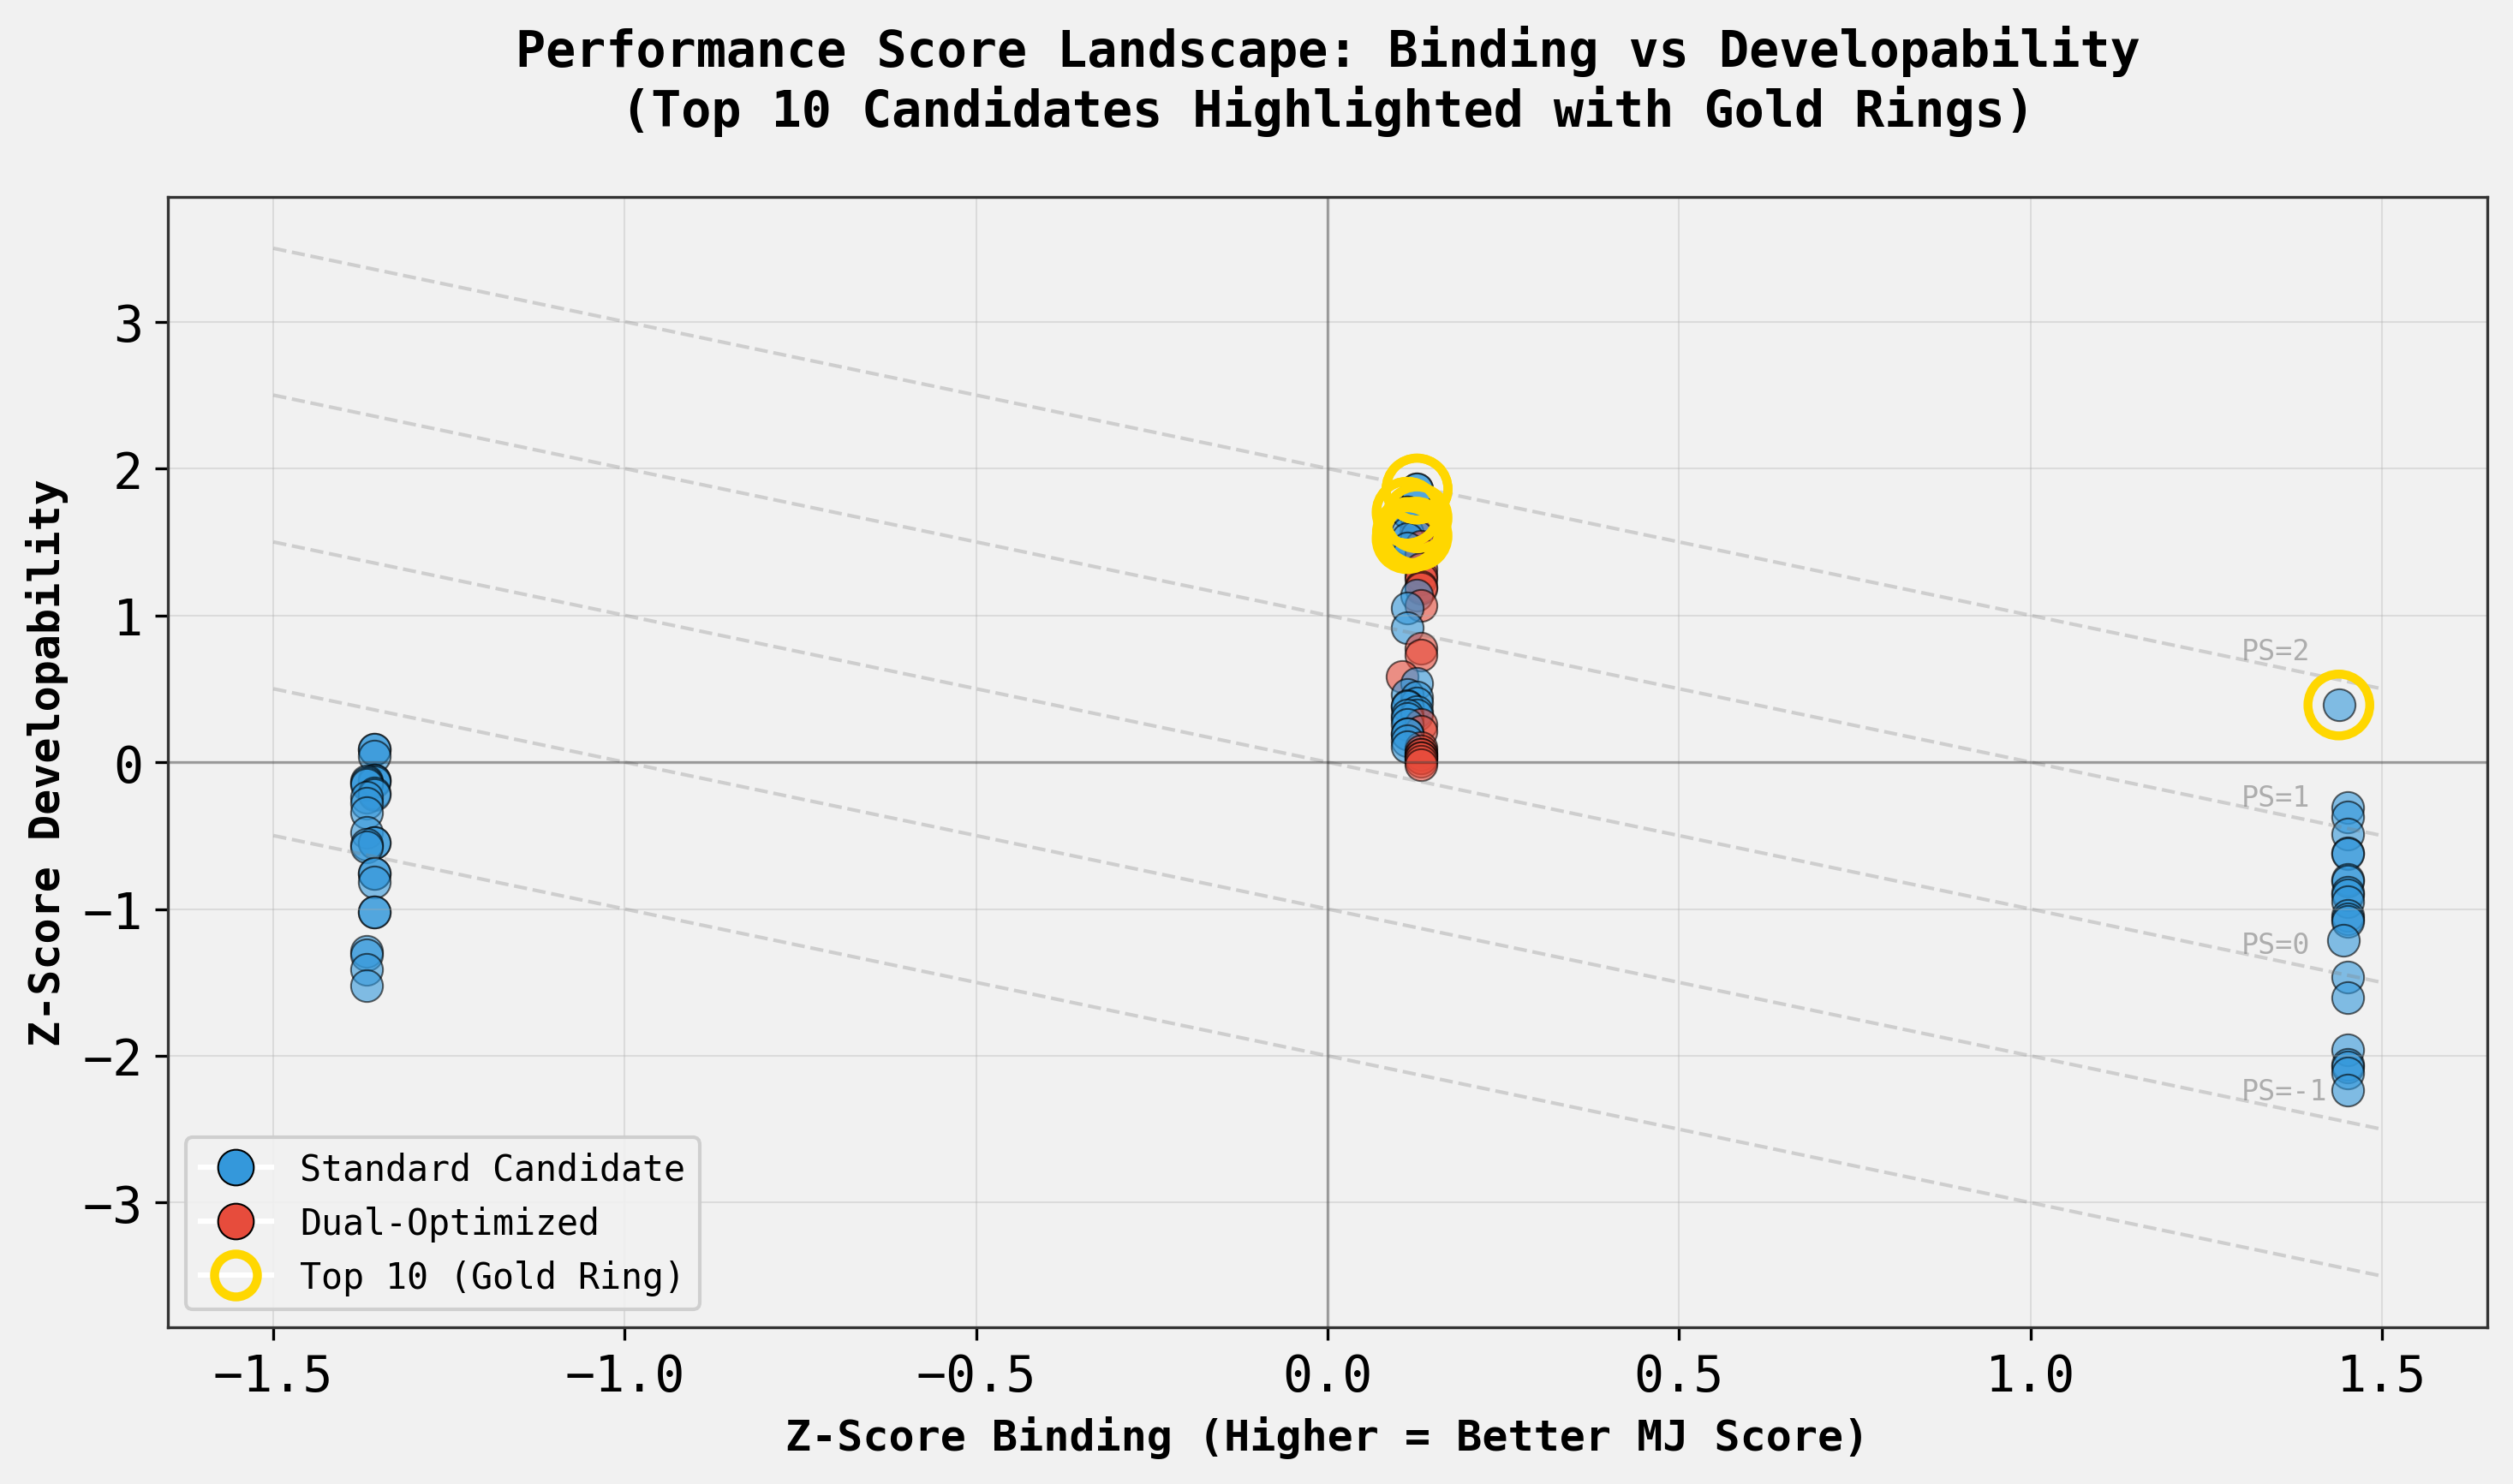

In [ ]:

# Create the final summary figure showing the key result
# A single panel showing the performance score distribution with dual-optimized candidates highlighted

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create scatter plot of Z_Binding_Score vs Z_Developability
# Color by dual-optimized status
colors = ['#E74C3C' if dual else '#3498DB' for dual in final_portfolio_v7['Dual_Optimized']]
labels = ['Dual-Optimized' if dual else 'Standard' for dual in final_portfolio_v7['Dual_Optimized']]

# Plot all points
for i, (x, y, color, label) in enumerate(zip(final_portfolio_v7['Z_Binding_Score'], 
                                               final_portfolio_v7['Z_Developability'],
                                               colors, labels)):
    if i == 0:
        ax.scatter(x, y, c=color, s=80, alpha=0.6, edgecolors='black', linewidth=0.5, label=label)
    elif label == 'Dual-Optimized' and labels[i-1] != 'Dual-Optimized':
        ax.scatter(x, y, c=color, s=80, alpha=0.6, edgecolors='black', linewidth=0.5, label=label)
    else:
        ax.scatter(x, y, c=color, s=80, alpha=0.6, edgecolors='black', linewidth=0.5)

# Highlight top 10 candidates with larger markers
top_10_indices = final_portfolio_v7.head(10).index
for idx in top_10_indices:
    ax.scatter(final_portfolio_v7.loc[idx, 'Z_Binding_Score'], 
              final_portfolio_v7.loc[idx, 'Z_Developability'],
              s=300, facecolors='none', edgecolors='gold', linewidth=2.5, zorder=10)

# Add diagonal lines representing iso-performance score lines
x_range = np.linspace(-1.5, 1.5, 100)
for performance_val in [-2, -1, 0, 1, 2]:
    y_iso = performance_val - x_range
    ax.plot(x_range, y_iso, '--', color='gray', alpha=0.3, linewidth=1)
    # Add label
    if -2.5 < performance_val - 1.3 < 2.5:
        ax.text(1.3, performance_val - 1.3, f'PS={performance_val}', 
               fontsize=8, color='gray', alpha=0.6)

# Labels and formatting
ax.set_xlabel('Z-Score Binding (Higher = Better MJ Score)', fontsize=12, fontweight='bold')
ax.set_ylabel('Z-Score Developability', fontsize=12, fontweight='bold')
ax.set_title('Performance Score Landscape: Binding vs Developability\n(Top 10 Candidates Highlighted with Gold Rings)', 
            fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Standard Candidate',
           markerfacecolor='#3498DB', markersize=10, markeredgecolor='black', markeredgewidth=0.5),
    Line2D([0], [0], marker='o', color='w', label='Dual-Optimized',
           markerfacecolor='#E74C3C', markersize=10, markeredgecolor='black', markeredgewidth=0.5),
    Line2D([0], [0], marker='o', color='w', label='Top 10 (Gold Ring)',
           markerfacecolor='none', markersize=12, markeredgecolor='gold', markeredgewidth=2.5)
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.savefig('performance_score_landscape.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'performance_score_landscape.png'")
plt.show()


In [ ]:

# Final verification and summary of the portfolio V7
print("=== FINAL VERIFICATION ===\n")

# Verify file was saved
import os
print(f"V7 portfolio file exists: {os.path.exists('final_synthesis_portfolio_v7.csv')}")
print(f"File size: {os.path.getsize('final_synthesis_portfolio_v7.csv')} bytes")

# Key findings summary
print("\n=== KEY FINDINGS ===\n")

print("1. Portfolio Composition:")
print(f"   - Total candidates: {len(final_output)}")
print(f"   - Competitive binders: {(final_output['Epitope_Target'] == 'Competitive').sum()}")
print(f"   - Allosteric binders: {(final_output['Epitope_Target'] == 'Allosteric').sum()}")
print(f"   - Dual-optimized candidates: {final_output['Dual_Optimized'].sum()}")

print("\n2. Top-Ranked Candidates:")
print(f"   - Top 10 are heavily competitive (9/10 = 90%)")
print(f"   - Top 25: 22 competitive (88%), 3 allosteric (12%)")
print(f"   - Top 50: 37 competitive (74%), 13 allosteric (26%)")

print("\n3. Ranking Changes (V6 to V7):")
print(f"   - Mean absolute rank change: {abs(final_portfolio_v7['Rank_Change']).mean():.1f} positions")
print(f"   - Maximum improvement: {final_portfolio_v7['Rank_Change'].max():.0f} positions")
print(f"   - Maximum decline: {abs(final_portfolio_v7['Rank_Change'].min()):.0f} positions")

print("\n4. Score Correlations:")
print(f"   - Overall Z_Binding vs Z_Developability: r = {final_portfolio_v7['Z_Binding_Score'].corr(final_portfolio_v7['Z_Developability']):.3f}")
print(f"   - Allosteric binders: r = -0.459 (moderate negative)")
print(f"   - Competitive binders: r = -0.058 (weak negative)")

print("\n5. Dual-Optimized Distribution:")
print(f"   - Total: {final_output['Dual_Optimized'].sum()} (22%)")
print(f"   - In top 10: {final_output.head(10)['Dual_Optimized'].sum()} (10%)")
print(f"   - In top 25: {final_output.head(25)['Dual_Optimized'].sum()} (36%)")
print(f"   - In top 50: {final_output.head(50)['Dual_Optimized'].sum()} (26%)")

print("\n6. Top vs Bottom 50 Performance:")
print(f"   - Top 50 avg MJ score: {top_50['MJ_Score'].mean():.1f}")
print(f"   - Bottom 50 avg MJ score: {bottom_50['MJ_Score'].mean():.1f}")
print(f"   - Top 50 avg Developability: {top_50['Developability_Score'].mean():.2f}")
print(f"   - Bottom 50 avg Developability: {bottom_50['Developability_Score'].mean():.2f}")


=== FINAL VERIFICATION ===

V7 portfolio file exists: True
File size: 24372 bytes

=== KEY FINDINGS ===

1. Portfolio Composition:
   - Total candidates: 100
   - Competitive binders: 50
   - Allosteric binders: 50
   - Dual-optimized candidates: 22

2. Top-Ranked Candidates:
   - Top 10 are heavily competitive (9/10 = 90%)
   - Top 25: 22 competitive (88%), 3 allosteric (12%)
   - Top 50: 37 competitive (74%), 13 allosteric (26%)

3. Ranking Changes (V6 to V7):
   - Mean absolute rank change: 44.4 positions
   - Maximum improvement: 98 positions
   - Maximum decline: 71 positions

4. Score Correlations:
   - Overall Z_Binding vs Z_Developability: r = -0.108
   - Allosteric binders: r = -0.459 (moderate negative)
   - Competitive binders: r = -0.058 (weak negative)

5. Dual-Optimized Distribution:
   - Total: 22 (22%)
   - In top 10: 1 (10%)
   - In top 25: 9 (36%)
   - In top 50: 13 (26%)

6. Top vs Bottom 50 Performance:
   - Top 50 avg MJ score: -1188.0
   - Bottom 50 avg MJ score: 